- Age > cut 범주 나누기
- title 

사용 라이브러리 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import csv
import warnings 
warnings.filterwarnings('ignore')

### Dataset 확인

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
fulldata = [train, test]
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.shape

(891, 12)

In [6]:
test = pd.read_csv('test.csv')
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [7]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
test.shape

(418, 11)

In [10]:
# train 결측값
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# test 결측값
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### 데이터 전처리

Age -> 평균 29.69

In [12]:
train['Age'] = train['Age'].fillna(29.69)     # train
test['Age'] = test['Age'].fillna(29.69)   # test

Embarked -> 최빈값 S(0)

In [13]:
train['Embarked'] = train['Embarked'].fillna('S')

Fare -> 최빈값 8.05

In [14]:
fare = train['Fare']
fare.mode()

0    8.05
dtype: float64

In [15]:
test['Fare'] = test['Fare'].fillna(8.05)

#### 새 변수 생성

In [16]:
# age_gr / married / f_nm / f_ox / fare_gr

Age > Age_gr

In [17]:
# https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy#Step-2:-Gather-the-Data

In [18]:
train['Age_gr'] = pd.cut(train['Age'], 5)
test['Age_gr'] = pd.cut(test['Age'], 5)

train['Age_gr'].value_counts()

(16.336, 32.252]    523
(32.252, 48.168]    188
(0.34, 16.336]      100
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: Age_gr, dtype: int64

f_nm

In [19]:
train['F_nm'] = train['SibSp'] + train['Parch'] + 1
test['F_nm'] = test['SibSp'] + test['Parch'] + 1 

f_ox

In [20]:
def f_ox(x):
    if x == 1:
        return 1
    if x >= 2:
        return 0  

In [21]:
train['F_ox'] = train['F_nm'].apply(lambda x: f_ox(x))
test['F_ox'] = test['F_nm'].apply(lambda x: f_ox(x))

Fare > Fare_gr

In [22]:
train['Fare'] = pd.qcut(train['Fare'], 4)
test['Fare'] = pd.qcut(test['Fare'], 4)

train['Fare'].value_counts()

(7.91, 14.454]     224
(-0.001, 7.91]     223
(14.454, 31.0]     222
(31.0, 512.329]    222
Name: Fare, dtype: int64

Name > Title 

In [23]:
train['Title'] = train['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
test['Title'] = test['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

In [24]:
train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Ms                1
the Countess      1
Capt              1
Jonkheer          1
Sir               1
Lady              1
Don               1
Mme               1
Name: Title, dtype: int64

In [25]:
stat_min = 10 
title_names = (train['Title'].value_counts() < stat_min)
title_names2 = (test['Title'].value_counts() < stat_min)

train['Title'] = train['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
test['Title'] = test['Title'].apply(lambda x: 'Misc' if title_names2.loc[x] == True else x)

print(train['Title'].value_counts())
print("-"*10)
print(test['Title'].value_counts())

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------
Mr        240
Miss       78
Mrs        72
Master     21
Misc        7
Name: Title, dtype: int64


In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_gr,F_nm,F_ox,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,"(-0.001, 7.91]",NaN,S,"(16.336, 32.252]",2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,"(31.0, 512.329]",C85,C,"(32.252, 48.168]",2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,"(7.91, 14.454]",NaN,S,"(16.336, 32.252]",1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,"(31.0, 512.329]",C123,S,"(32.252, 48.168]",2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,"(7.91, 14.454]",NaN,S,"(32.252, 48.168]",1,1,Mr


#### 문자열 -> 숫자형으로 인코딩

In [27]:
label = LabelEncoder()
train['Title_Code'] = label.fit_transform(train['Title'])
train['AgeBin_Code'] = label.fit_transform(train['Age_gr'])
train['FareBin_Code'] = label.fit_transform(train['Fare'])

test['Title_Code'] = label.fit_transform(test['Title'])
test['AgeBin_Code'] = label.fit_transform(test['Age_gr'])
test['FareBin_Code'] = label.fit_transform(test['Fare'])

#### 필요없는 변수 drop

In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_gr,F_nm,F_ox,Title,Title_Code,AgeBin_Code,FareBin_Code
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,"(-0.001, 7.91]",NaN,S,"(16.336, 32.252]",2,0,Mr,3,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,"(31.0, 512.329]",C85,C,"(32.252, 48.168]",2,0,Mrs,4,2,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,"(7.91, 14.454]",NaN,S,"(16.336, 32.252]",1,1,Miss,2,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,"(31.0, 512.329]",C123,S,"(32.252, 48.168]",2,0,Mrs,4,2,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,"(7.91, 14.454]",NaN,S,"(32.252, 48.168]",1,1,Mr,3,2,1


In [29]:

train = train.drop(['Title', 'Age', 'Fare','Cabin', 'SibSp', 'Parch','Ticket','Name', 'Age_gr'], axis=1)
test = test.drop(['Title', 'Age', 'Fare','Cabin', 'SibSp', 'Parch','Ticket','Name', 'Age_gr'], axis=1)

In [30]:
train.head()

,PassengerId,Survived,Pclass,Sex,Embarked,F_nm,F_ox,Title_Code,AgeBin_Code,FareBin_Code
0,1,0,3,male,S,2,0,3,1,0
1,2,1,1,female,C,2,0,4,2,3
2,3,1,3,female,S,1,1,2,1,1
3,4,1,1,female,S,2,0,4,2,3
4,5,0,3,male,S,1,1,3,2,1


In [31]:
test.head()

,PassengerId,Pclass,Sex,Embarked,F_nm,F_ox,Title_Code,AgeBin_Code,FareBin_Code
0,892,3,male,Q,1,1,3,2,0
1,893,3,female,S,2,0,4,3,0
2,894,2,male,Q,1,1,3,4,1
3,895,3,male,S,1,1,3,1,1
4,896,3,female,S,3,0,4,1,1


In [32]:
train=pd.concat([train, pd.get_dummies(train['Sex'], prefix='Sex')], axis=1) 
test=pd.concat([test, pd.get_dummies(test['Sex'], prefix='Sex')], axis=1) 

train=pd.concat([train, pd.get_dummies(train['Pclass'], prefix='Pclass')], axis=1) 
test=pd.concat([test, pd.get_dummies(test['Pclass'], prefix='Pclass')], axis=1) 

train=pd.concat([train, pd.get_dummies(train['Embarked'], prefix='Embarked')], axis=1) 
test=pd.concat([test, pd.get_dummies(test['Embarked'], prefix='Embarked')], axis=1) 

train=pd.concat([train, pd.get_dummies(train['Title_Code'], prefix='Title_Code')], axis=1) 
test=pd.concat([test, pd.get_dummies(test['Title_Code'], prefix='Title_Code')], axis=1) 

train=pd.concat([train, pd.get_dummies(train['AgeBin_Code'], prefix='AgeBin_Code')], axis=1) 
test=pd.concat([test, pd.get_dummies(test['AgeBin_Code'], prefix='AgeBin_Code')], axis=1) 

train=pd.concat([train, pd.get_dummies(train['FareBin_Code'], prefix='FareBin_Code')], axis=1) 
test=pd.concat([test, pd.get_dummies(test['FareBin_Code'], prefix='FareBin_Code')], axis=1) 

In [33]:
train = train.drop(['PassengerId','Sex','Pclass' ,'Embarked','Title_Code','AgeBin_Code','FareBin_Code'], axis=1)
test = test.drop(['Sex','Pclass' ,'Embarked','Title_Code','AgeBin_Code','FareBin_Code'], axis=1)

In [34]:
train.head()

,Survived,F_nm,F_ox,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,...,Title_Code_4,AgeBin_Code_0,AgeBin_Code_1,AgeBin_Code_2,AgeBin_Code_3,AgeBin_Code_4,FareBin_Code_0,FareBin_Code_1,FareBin_Code_2,FareBin_Code_3
0,0,2,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
1,1,2,0,1,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
2,1,1,1,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1,2,0,1,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
4,0,1,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [35]:
test.head()

,PassengerId,F_nm,F_ox,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,...,Title_Code_4,AgeBin_Code_0,AgeBin_Code_1,AgeBin_Code_2,AgeBin_Code_3,AgeBin_Code_4,FareBin_Code_0,FareBin_Code_1,FareBin_Code_2,FareBin_Code_3
0,892,1,1,0,1,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
1,893,2,0,1,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0
2,894,1,1,0,1,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
3,895,1,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,896,3,0,1,0,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0


In [36]:
train.columns

Index(['Survived', 'F_nm', 'F_ox', 'Sex_female', 'Sex_male', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Title_Code_0', 'Title_Code_1', 'Title_Code_2', 'Title_Code_3',
       'Title_Code_4', 'AgeBin_Code_0', 'AgeBin_Code_1', 'AgeBin_Code_2',
       'AgeBin_Code_3', 'AgeBin_Code_4', 'FareBin_Code_0', 'FareBin_Code_1',
       'FareBin_Code_2', 'FareBin_Code_3'],
      dtype='object')

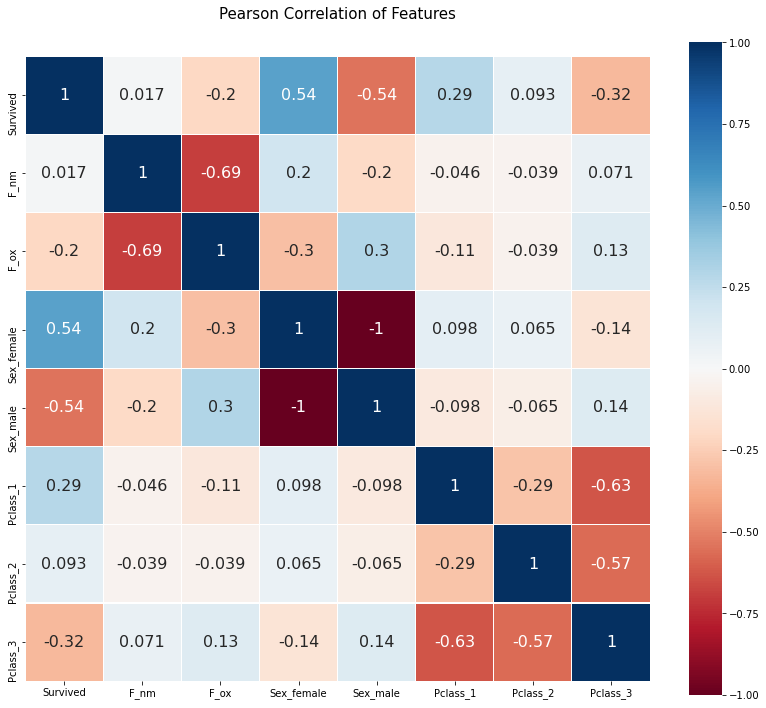

In [37]:
import seaborn as sns
heatmap_data = train[['Survived', 'F_nm', 'F_ox', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3']]

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

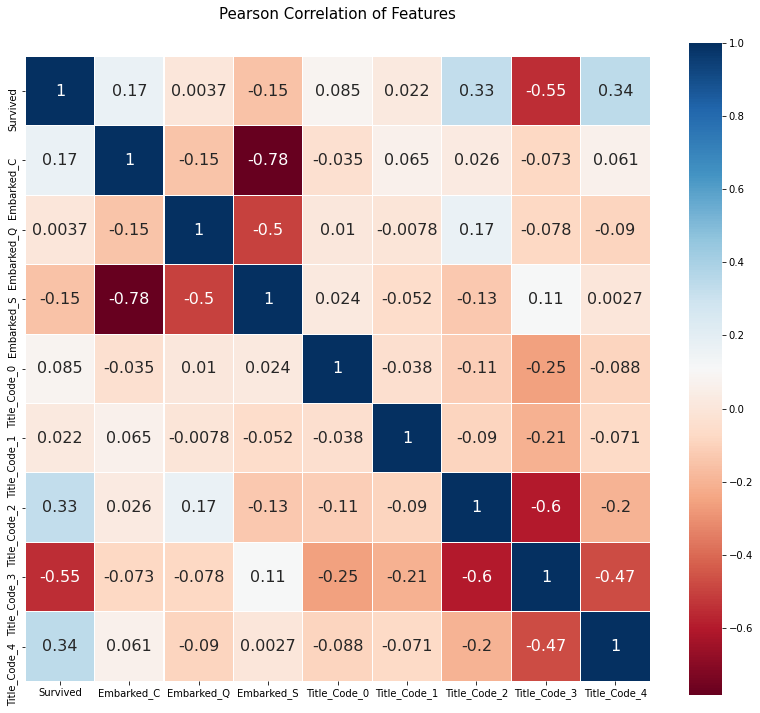

In [38]:
import seaborn as sns
heatmap_data = train[['Survived', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Title_Code_0', 'Title_Code_1', 'Title_Code_2',
       'Title_Code_3', 'Title_Code_4']]

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

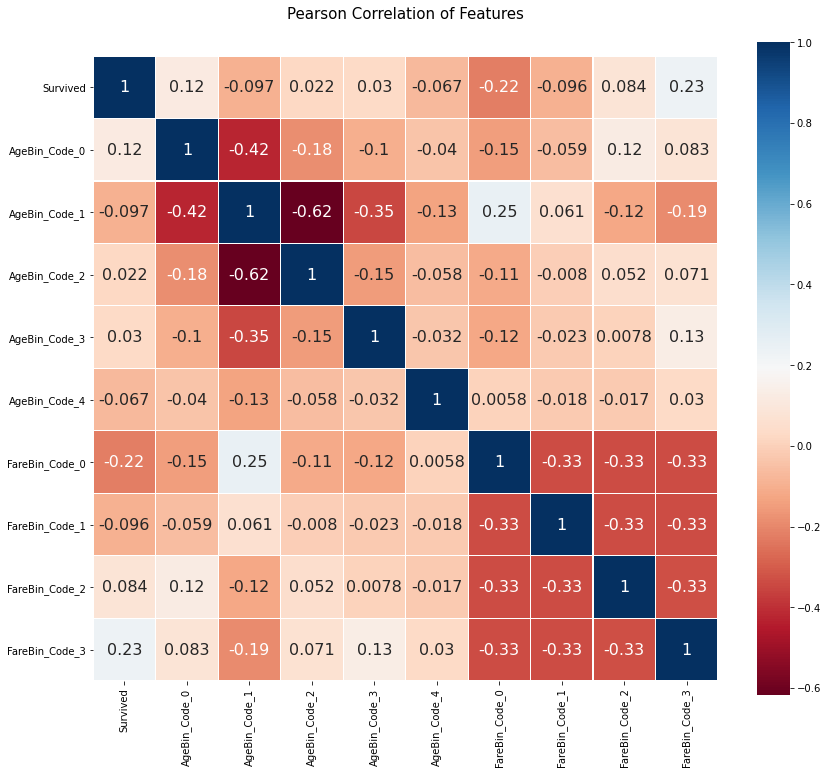

In [39]:
import seaborn as sns
heatmap_data = train[['Survived', 'AgeBin_Code_0', 'AgeBin_Code_1',
       'AgeBin_Code_2', 'AgeBin_Code_3', 'AgeBin_Code_4', 'FareBin_Code_0',
       'FareBin_Code_1', 'FareBin_Code_2', 'FareBin_Code_3']]

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

#### 변수 간 관계

In [40]:
# sns.pairplot(train,diag_kind='hist')
# plt.show()

In [41]:
# import warnings 
# warnings.filterwarnings('ignore')

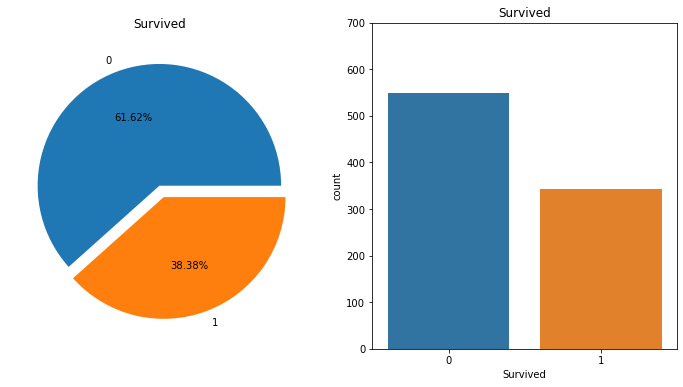

In [42]:
f,ax=plt.subplots(1,2,figsize=(12,6))

train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived',data=train,ax=ax[1])
ax[1].set_title('Survived')
plt.ylim(0,700)
plt.show()

ValueError: Could not interpret input 'Pclass'

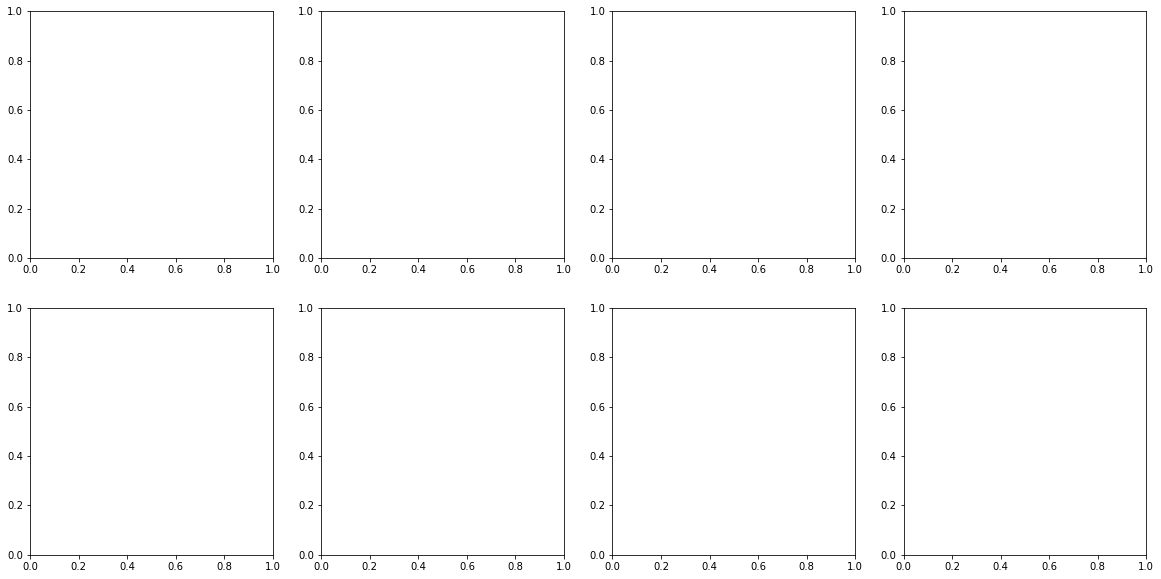

In [43]:
# 변수별 평균 생존률

fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4)
fig.set_size_inches(20,10)

sns.barplot(x='Pclass', y='Survived',data= train, ax=ax1)
sns.barplot(x='Sex', y='Survived',data= train, ax=ax2)
sns.barplot(x='Embarked', y='Survived',data= train, ax=ax3)
sns.barplot(x='Age_gr', y='Survived',data= train, ax=ax4)
sns.barplot(x='F_nm', y='Survived',data= train, ax=ax5)
sns.barplot(x='F_ox', y='Survived',data= train, ax=ax6)
sns.barplot(x='Married', y='Survived',data= train, ax=ax7)
sns.barplot(x='Fare', y='Survived', data= train, ax=ax8)

ax1.set(xlabel='')
ax2.set(xlabel='')
ax3.set(xlabel='')
ax4.set(xlabel='')
ax5.set(xlabel='')
ax6.set(xlabel='')
ax7.set(xlabel='')
ax8.set(xlabel='')

ax1.set(title="Pclass")
ax2.set(title="Sex")
ax3.set(title="Embarked")
ax4.set(title="Age_gr")
ax5.set(title="F_nm")
ax6.set(title="F_ox")
ax7.set(title="Married")
ax8.set(title='Fare')



In [ ]:
# sharey=True : y축 동일화 

#### 분류 모델

In [44]:
train['Survived'].unique()

array([0, 1], dtype=int64)

train, test split

In [45]:
X = train.iloc[:,1:].values
y = train['Survived']
X.shape, y.shape

((891, 24), (891,))

In [46]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [48]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 24), (891,), (418, 24))

In [49]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

83.05

In [50]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
10,Title_Code_0,1.825113
2,Sex_female,1.003905
4,Pclass_1,0.803022
15,AgeBin_Code_0,0.781982
23,FareBin_Code_3,0.417159
14,Title_Code_4,0.296858
16,AgeBin_Code_1,0.229471
7,Embarked_C,0.182142
22,FareBin_Code_2,0.079910
5,Pclass_2,0.064721


In [51]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.61

In [52]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

85.75

In [53]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.34

In [54]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

88.66

In [60]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest
# 77033

88.66

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=2021)
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2021,
 'verbose': 0,
 'warm_start': False}

In [ ]:
params = {
    'n_estimators': [130],
    'max_depth': [2,3,5,10],
    'min_samples_leaf' :[1,5,8],
    'min_samples_split' : [2,3,5]
}
# n_estimator = 100
# max sample/ max feature 

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_rfc = GridSearchCV(rfc, param_grid=params, scoring ='accuracy', cv=5 )
grid_rfc.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2021),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [130]},
             scoring='accuracy')

In [ ]:
# 땅!

In [61]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('16r.csv', index=False)

In [57]:
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
Y_pred = xgb.predict(X_test)
xgb.score(X_train, Y_train)
acc_xgb = round(xgb.score(X_train, Y_train) * 100, 2)
acc_xgb
# 77751

[04:08:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


88.33

In [ ]:
# submission = pd.DataFrame({
#         "PassengerId": test["PassengerId"],
#         "Survived": Y_pred
#     })
# submission.to_csv('6r.csv', index=False)

In [ ]:
# 6. Fare (qcut=6)
# corr 0.26 -> 0.32
# xgv : 90.35 / 77990 > fix 

# 12. 파라미터 튜닝 
# {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 130}
# rfc 82.83 / 78947 > fix

# xgb 88.33 / 77033 
# rfc 88.66 / 77511
